In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.decomposition import PCA

In [51]:
hospital_data=pd.read_csv("C:/Users/eagls/bootcamp/프로젝트/train.csv")
hospital_data_df = pd.DataFrame(hospital_data)

In [52]:
hospital_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [53]:
hospital_data_df.drop_duplicates()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [54]:
hospital_data_df1 = hospital_data_df.copy()

In [55]:
#찾을수없는 결측값 삭제
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==3].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==26].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==55].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==94].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==353].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==362].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==363].index,inplace=True)
hospital_data_df1.drop(hospital_data_df1[hospital_data_df1['inst_id']==87].index,inplace=True)


In [56]:
#shape 보기
hospital_data_df1.shape

(293, 58)

In [57]:
hospital_data_df1.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               0
salescost1             0
sga1                   0
salary1                0
noi1                   0
noe1                   0
interest1              0
ctax1                  0
profit1                0
liquidAsset1           0
quickAsset1            0
receivableS1           0
inventoryAsset1        0
nonCAsset1             0
tanAsset1              0
OnonCAsset1            0
receivableL1           0
debt1                  0
liquidLiabilities1     0
shortLoan1             0
NCLiabilities1         0
longLoan1              0
netAsset1              0
surplus1               0
revenue2               0
salescost2             0
sga2                   0
salary2                0
noi2                   0
noe2                   0
interest2              0
ctax2                  0
profit2                0


In [58]:
#병원 종류 수치화
hospital_data_df1=pd.get_dummies(hospital_data_df1,columns=['instkind'])

In [59]:
#도시 수치화
hospital_data_df1=pd.get_dummies(hospital_data_df1,columns=['sido'])

In [60]:
#outcome 수치화하기
hospital_data_df1['OC'] = hospital_data_df1['OC'].map({' close': 0, 'open':1})

In [61]:
hospital_data_df1.head()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,1,1,73,20071228,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,89,20161228,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0,0,1,0,0,0,0,0,0,0
3,7,1,141,20000814,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,0,0,0,0,1,0,0,0,0,0
4,9,1,32,20050901,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,0,0,0,1,0,0,0,0,0,0
5,11,1,155,20020501,243.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
#ownerchange 수치화
hospital_data_df1['ownerChange'] = hospital_data_df1['ownerChange'].map({'NA':-1,'change': 0, 'same': 1})

In [63]:
hospital_data_df1.head()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,1,1,73,20071228,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,89,20161228,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0,0,1,0,0,0,0,0,0,0
3,7,1,141,20000814,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,0,0,0,0,1,0,0,0,0,0
4,9,1,32,20050901,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,0,0,0,1,0,0,0,0,0,0
5,11,1,155,20020501,243.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
#빈 센 -1으로 채우기
hospital_data_df1['bedCount'].fillna(-1,inplace=True)

In [65]:
hospital_data_df1['ownerChange'].fillna(-1,inplace=True)

In [66]:
hospital_data_df1.head()

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,1,1,73,20071228,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,...,0,0,0,0,0,0,0,0,0,0
2,4,1,89,20161228,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,...,0,0,1,0,0,0,0,0,0,0
3,7,1,141,20000814,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,...,0,0,0,0,1,0,0,0,0,0
4,9,1,32,20050901,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,...,0,0,0,1,0,0,0,0,0,0
5,11,1,155,20020501,243.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,...,0,0,0,1,0,0,0,0,0,0


In [67]:
#employ숫자 employee1 employee2 둘중 하나만없을시 다른하나로 채우기
hospital_data_df1.loc[hospital_data_df1['inst_id']==58,'employee2'] = hospital_data_df1.loc[hospital_data_df1['inst_id']==58,'employee1']
hospital_data_df1.loc[hospital_data_df1['inst_id']==64,'employee2'] = hospital_data_df1.loc[hospital_data_df1['inst_id']==64,'employee1']
hospital_data_df1.loc[hospital_data_df1['inst_id']==298,'employee1'] = hospital_data_df1.loc[hospital_data_df1['inst_id']==298,'employee2']
hospital_data_df1.loc[hospital_data_df1['inst_id']==327,'employee2'] = hospital_data_df1.loc[hospital_data_df1['inst_id']==327,'employee1']
hospital_data_df1.loc[hospital_data_df1['inst_id']==96,'employee2'] = hospital_data_df1.loc[hospital_data_df1['inst_id']==96,'employee1']
hospital_data_df1.loc[hospital_data_df1['inst_id']==427,'employee2'] = hospital_data_df1.loc[hospital_data_df1['inst_id']==427,'employee1']

In [68]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==74, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==74, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_seoul']==1)&(hospital_data_df1['instkind_traditional_hospital']==1),'employee1'].mean())
hospital_data_df1.loc[hospital_data_df1['inst_id']==74, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==74, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_seoul']==1)&(hospital_data_df1['instkind_traditional_hospital']==1),'employee1'].mean())


In [69]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==81, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==81, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_seoul']==1)&(hospital_data_df1['instkind_traditional_hospital']==1),'employee1'].mean())


In [70]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==140, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==140, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_hospital']==1),'employee1'].mean())

In [71]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==140, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==140, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_hospital']==1),'employee2'].mean())

In [72]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==306, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==306, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_nursing_hospital']==1),'employee1'].mean())
hospital_data_df1.loc[hospital_data_df1['inst_id']==306, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==306, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_nursing_hospital']==1),'employee2'].mean())

In [73]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==345, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==345, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_busan']==1)&(hospital_data_df1['instkind_traditional_hospital']==1),'employee1'].mean())
hospital_data_df1.loc[hospital_data_df1['inst_id']==345, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==345, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_busan']==1)&(hospital_data_df1['instkind_traditional_hospital']==1),'employee2'].mean())

In [74]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==369, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==369, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gangwon']==1)&(hospital_data_df1['instkind_hospital']==1),'employee1'].mean())
hospital_data_df1.loc[hospital_data_df1['inst_id']==369, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==369, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gangwon']==1)&(hospital_data_df1['instkind_hospital']==1),'employee2'].mean())

In [75]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==407, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==407, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_hospital']==1),'employee1'].mean())
hospital_data_df1.loc[hospital_data_df1['inst_id']==407, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==407, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_hospital']==1),'employee2'].mean())

In [76]:
hospital_data_df1.loc[hospital_data_df1['inst_id']==426, 'employee1']=hospital_data_df1.loc[hospital_data_df1['inst_id']==426, 'employee1'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_hospital']==1),'employee1'].mean())
hospital_data_df1.loc[hospital_data_df1['inst_id']==426, 'employee2']=hospital_data_df1.loc[hospital_data_df1['inst_id']==426, 'employee2'].fillna(hospital_data_df1.loc[(hospital_data_df1['sido_gyeongbuk']==1)&(hospital_data_df1['instkind_hospital']==1),'employee2'].mean())

In [77]:
hospital_data_df1.loc[hospital_data_df1.isna().any(axis=1)]

,inst_id,OC,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan


In [78]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [79]:
y=hospital_data_df1.pop('OC')
X=hospital_data_df1

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [81]:
hospital_data_df1

,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,sido_gwangju,sido_gyeongbuk,sido_gyeonggi,sido_gyeongnam,sido_incheon,sido_jeonbuk,sido_jeonnam,sido_sejong,sido_seoul,sido_ulsan
0,1,73,20071228,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,...,0,0,0,0,0,0,0,0,0,0
2,4,89,20161228,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,...,0,0,1,0,0,0,0,0,0,0
3,7,141,20000814,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,...,0,0,0,0,1,0,0,0,0,0
4,9,32,20050901,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,...,0,0,0,1,0,0,0,0,0,0
5,11,155,20020501,243.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,65414325.0,7.412694e+08,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,178,20050211,214.0,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,...,0,0,0,0,0,0,1,0,0,0
297,423,159,20140618,-1.0,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,1.398513e+08,...,0,0,0,0,0,0,0,0,0,0
298,426,107,19830705,-1.0,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,1.379810e+08,...,0,1,0,0,0,0,0,0,0,0
299,427,169,20070101,180.0,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,5.366919e+08,...,0,0,1,0,0,0,0,0,0,0


In [82]:
X = scaler.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [84]:
logre = LogisticRegression()
ranfor =RandomForestClassifier()

In [85]:
logre.fit(X_train,y_train)
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [86]:
logpred = logre.predict(X_test)

In [87]:
ranpred=ranfor.predict(X_test)
print(ranpred)
y_test



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


51     1
186    1
132    1
200    1
266    1
66     1
279    1
168    1
267    1
261    0
224    1
250    1
239    1
106    1
189    1
26     1
156    1
46     1
52     1
111    0
187    1
273    1
221    1
89     1
295    1
289    1
181    1
107    1
190    1
268    1
256    1
166    1
101    1
229    1
277    1
245    1
61     1
71     0
252    1
253    1
206    1
171    1
218    1
73     1
100    1
219    1
53     1
173    1
23     1
45     1
179    1
65     1
226    1
282    1
293    1
42     1
103    1
27     1
67     1
Name: OC, dtype: int64

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
logre_accuracy = accuracy_score(y_test, logpred)
logre_accuracy

0.9152542372881356

In [90]:
ranfor_accuracy = accuracy_score(y_test, ranpred)
ranfor_accuracy

0.9491525423728814

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [92]:
logprecision = precision_score(y_test, logpred) # 정밀도 계산
logrecall = recall_score(y_test, logpred) # 재현율 계산
logf1 = f1_score(y_test, logpred)

In [93]:
ranprecision = precision_score(y_test, ranpred) # 정밀도 계산
ranrecall = recall_score(y_test, ranpred) # 재현율 계산
ranf1 = f1_score(y_test, ranpred)

In [94]:
print(logprecision)
print(logrecall)
print(logf1)
print(ranprecision)
print(ranrecall)
print(ranf1)

0.9473684210526315
0.9642857142857143
0.9557522123893805
0.9491525423728814
1.0
0.9739130434782608


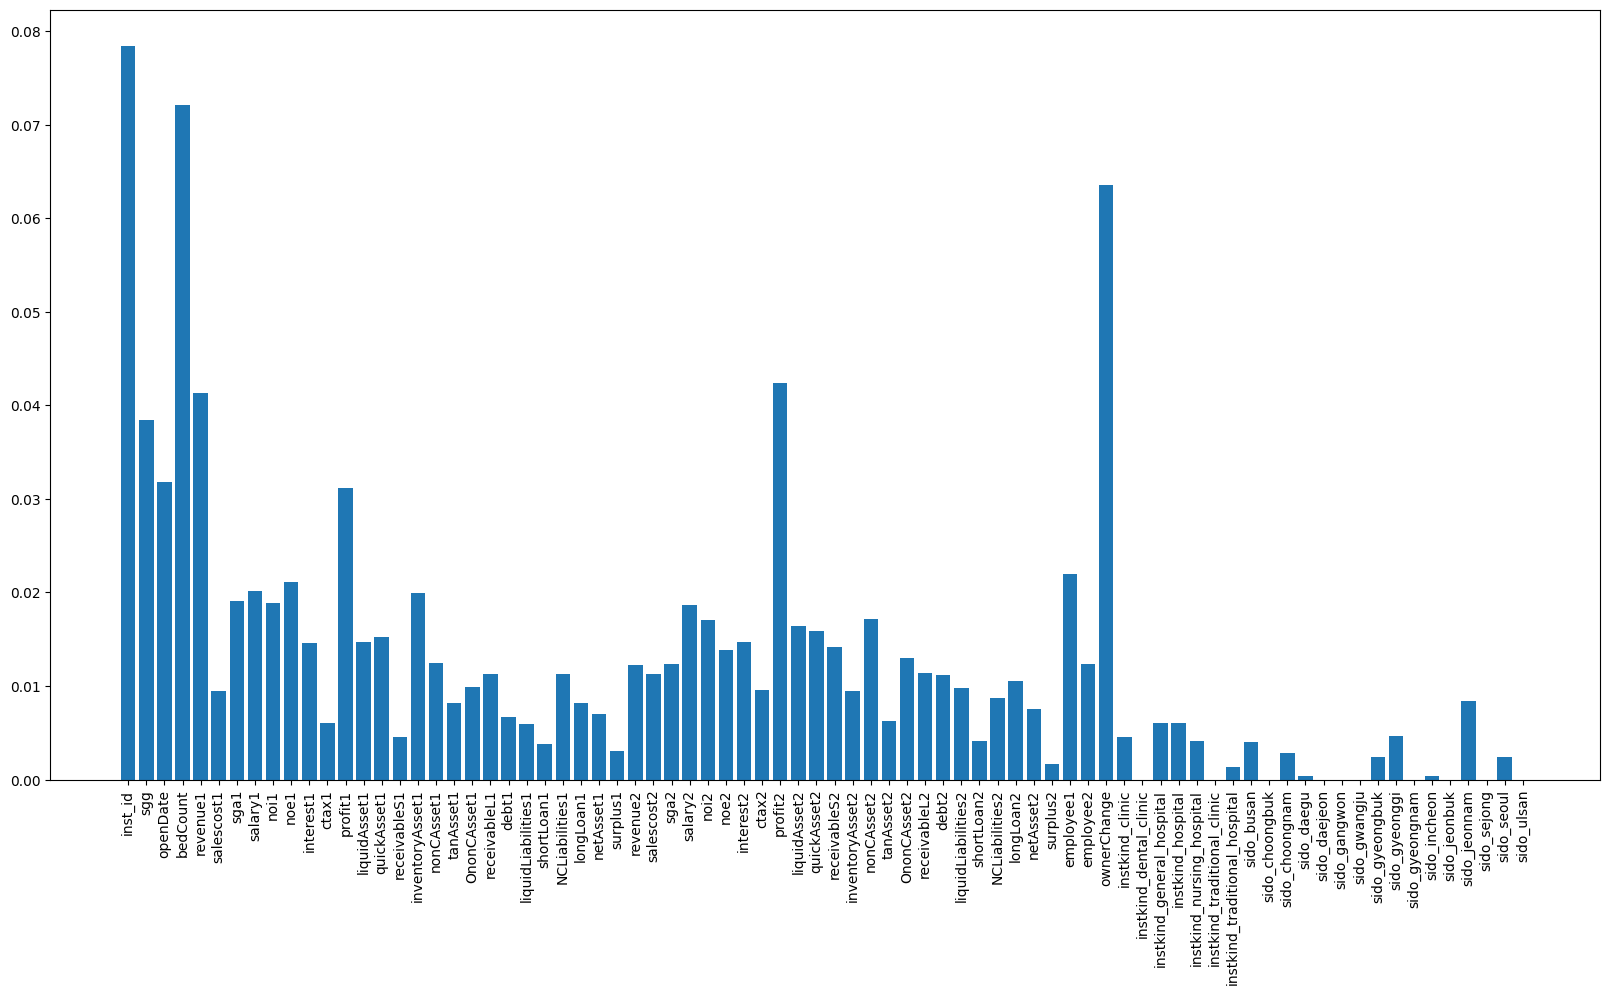

In [101]:
plt.figure(figsize=(20,10))
plt.bar(hospital_data_df1.columns,ranfor.feature_importances_)
plt.xticks(rotation=90);


In [103]:
from xgboost import XGBClassifier

In [104]:
boost=XGBClassifier()

In [105]:
boost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [106]:
y_pred = boost.predict(X_test)

In [107]:
boost_accuracy = accuracy_score(y_test, y_pred)
boost_accuracy

0.9491525423728814

In [108]:
# hyper parameters
param_grid = {
    'learning_rate':[0.01, 0.05,0.1],
    'max_depth': [3,5,10],
    'objective': ["reg:linear"],
    'min_child_weight':[1,3,5],
    'subsample':[0.5,0.7,1],
    'colsample_bytree':[0.5,0.7,1]

}

In [109]:
gridsearch=GridSearchCV(boost,param_grid,scoring='accuracy',cv=3,verbose=1)

In [110]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[23:24:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:24:38] WA

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10], 'min_child_weight': [1, 3, 5],
                         'objective': ['reg:linear'],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy', verbose=1)

In [112]:
gridsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 3,
 'objective': 'reg:linear',
 'subsample': 0.5}

In [113]:
gridsearch.best_score_

0.9487179487179486

In [114]:
temp = {
    'learning_rate':0.025,
    'max_depth': 10,
    'objective': "reg:linear",
    'min_child_weight': 5,
    'subsample':0.7,
    'colsample_bytree':1

}

In [115]:
xgbmodel = XGBClassifier(**temp,n_estimators=2000,early_stopping_rounds=10)

In [116]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=1)

[00:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.49035
[1]	validation_0-rmse:0.48119
[2]	validation_0-rmse:0.47124
[3]	validation_0-rmse:0.46274
[4]	validation_0-rmse:0.45468
[5]	validation_0-rmse:0.44549
[6]	validation_0-rmse:0.43761
[7]	validation_0-rmse:0.42926
[8]	validation_0-rmse:0.42095
[9]	validation_0-rmse:0.41325
[10]	validation_0-rmse:0.40623
[11]	validation_0-rmse:0.39907
[12]	validation_0-rmse:0.39315
[13]	validation_0-rmse:0.38614
[14]	validation_0-rmse:0.37976
[15]	validation_0-rmse:0.37373
[16]	validation_0-rmse:0.36760
[17]	validation_0-rmse:0.36162
[18]	validation_0-rmse:0.35598
[19]	validation_0-rmse:0.35147
[20]	validation_0-rmse:0.34670
[21]	validation_0-rmse:0.34195
[22]	validation_0-rmse:0.33709
[23]	validation_0-rmse:0.33369
[24]	validation_0-rmse:0.32928
[25]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              objective='reg:linear', predictor=None, ...)

In [117]:
xgb_pred = xgbmodel.predict(X_test)



In [118]:
a =accuracy_score(y_test,xgb_pred)
a

0.9491525423728814

In [119]:
#hospital_data_df1.drop('ctax1',axis=1,inplace=True)
#hospital_data_df1.drop('ctax2',axis=1,inplace=True)
#hospital_data_df1.drop('quickAsset2',axis=1,inplace=True)
#hospital_data_df1.drop('nonCAsset2',axis=1,inplace=True)
#hospital_data_df1.drop('nonCAsset1',axis=1,inplace=True)
#hospital_data_df1.drop('tanAsset2',axis=1,inplace=True)
#hospital_data_df1.drop('NCLiabilities2',axis=1,inplace=True)
#hospital_data_df1.drop('surplus2',axis=1,inplace=True)
#hospital_data_df1.drop('salary2',axis=1,inplace=True)
#hospital_data_df1.drop('receivableL1',axis=1,inplace=True)
#hospital_data_df1.drop('receivableL2',axis=1,inplace=True)
#hospital_data_df1.drop('sga2',axis=1,inplace=True)
#hospital_data_df1.drop('revenue2',axis=1,inplace=True)
#hospital_data_df1.drop('tanAsset1',axis=1,inplace=True)
#hospital_data_df1.drop('employee2',axis=1,inplace=True)
#hospital_data_df1.drop('longLoan2',axis=1,inplace=True)
#hospital_data_df1.drop('liquidLiabilities1',axis=1,inplace=True)
#hospital_data_df1.drop('salescost2',axis=1,inplace=True)
#hospital_data_df1.drop('inventoryAsset2',axis=1,inplace=True)

X1= hospital_data_df1[["bedCount","employee1","interest1","profit1","employee2","interest2","profit2"]]
#X1= hospital_data_df1[["bedCount","employee1","interest1","profit1","employee2","interest2","profit2","sido_choongnam","sido_gyeongnam","sido_gyeonggi","sido_busan","sido_jeonnam","sido_seoul","sido_jeonbuk","sido_ulsan","sido_incheon","sido_daejeon","sido_gangwon","sido_choongbuk","sido_daegu","sido_gyeongbuk","instkind_hospital","instkind_nursing_hospital","instkind_traditional_clinic","instkind_dental_clinic","instkind_general_hospital","instkind_clinic"]]


In [120]:
X1 = scaler.fit_transform(X1)

In [121]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y,test_size=0.2,random_state=19)

In [122]:
logre1=LogisticRegression()
ranfor1 =RandomForestClassifier()

In [123]:
logre1.fit(X1_train,y_train)
ranfor1.fit(X1_train,y_train)

RandomForestClassifier()

In [124]:
logre1pred = logre1.predict(X1_test)
ranfor1pred = ranfor1.predict(X1_test)


In [125]:
logre_accuracy = accuracy_score(y_test, logre1pred)
logre_accuracy

0.9491525423728814

In [126]:
ranfor_accuracy = accuracy_score(y_test, ranfor1pred)
ranfor_accuracy

0.9661016949152542

In [127]:
boost1 = XGBClassifier()

In [128]:
boost1.fit(X1_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
boost1_pred = boost1.predict(X1_test)

In [130]:
boost1_accuracy = accuracy_score(y_test,boost1_pred)
boost1_accuracy

0.9661016949152542

In [131]:
gridsearch1=GridSearchCV(boost1,param_grid,scoring='accuracy',cv=3,verbose=1)

In [132]:
gridsearch1.fit(X1_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[00:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:11:16] WA

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 10], 'min_child_weight': [1, 3, 5],
                         'objective': ['reg:linear'],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy', verbose=1)

In [133]:
gridsearch1.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 3,
 'objective': 'reg:linear',
 'subsample': 0.5}

In [134]:
gridsearch1.best_score_

0.9444444444444443

In [135]:
temp = {
    'learning_rate':0.025,
    'max_depth': 10,
    'objective': "reg:linear",
    'min_child_weight': 5,
    'subsample':0.7,
    'colsample_bytree':1

}

In [136]:
xgbmodel1 = XGBClassifier(**temp,n_estimators=2000,early_stopping_rounds=10)

In [137]:
xgbmodel1.fit(X1_train,y_train,eval_set=[(X1_test,y_test)],verbose=1)

[00:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.48944
[1]	validation_0-rmse:0.47915
[2]	validation_0-rmse:0.46944
[3]	validation_0-rmse:0.45932
[4]	validation_0-rmse:0.45011
[5]	validation_0-rmse:0.44080
[6]	validation_0-rmse:0.43146
[7]	validation_0-rmse:0.42168
[8]	validation_0-rmse:0.41396
[9]	validation_0-rmse:0.40556
[10]	validation_0-rmse:0.39794
[11]	validation_0-rmse:0.38953
[12]	validation_0-rmse:0.38195
[13]	validation_0-rmse:0.37500
[14]	validation_0-rmse:0.36774
[15]	validation_0-rmse:0.36100
[16]	validation_0-rmse:0.35429
[17]	validation_0-rmse:0.34804
[18]	validation_0-rmse:0.34142
[19]	validation_0-rmse:0.33533
[20]	validation_0-rmse:0.32956
[21]	validation_0-rmse:0.32411
[22]	validation_0-rmse:0.31857
[23]	validation_0-rmse:0.31331
[24]	validation_0-rmse:0.30749
[25]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=10, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=2000, n_jobs=None, num_parallel_tree=None,
              objective='reg:linear', predictor=None, ...)

In [138]:
xgb_pred1 = xgbmodel1.predict(X1_test)

In [139]:
a =accuracy_score(y_test,xgb_pred1)
a

0.9830508474576272

In [140]:
xgboost_precision1 = precision_score(y_test, xgb_pred1) # 정밀도 계산
xgboost_recall1 = recall_score(y_test, xgb_pred1) # 재현율 계산
xgboostf11 = f1_score(y_test, xgb_pred1)

In [141]:
print(xgboost_precision1)
print(xgboost_recall1 )
print(xgboostf11)

0.9827586206896551
1.0
0.9913043478260869


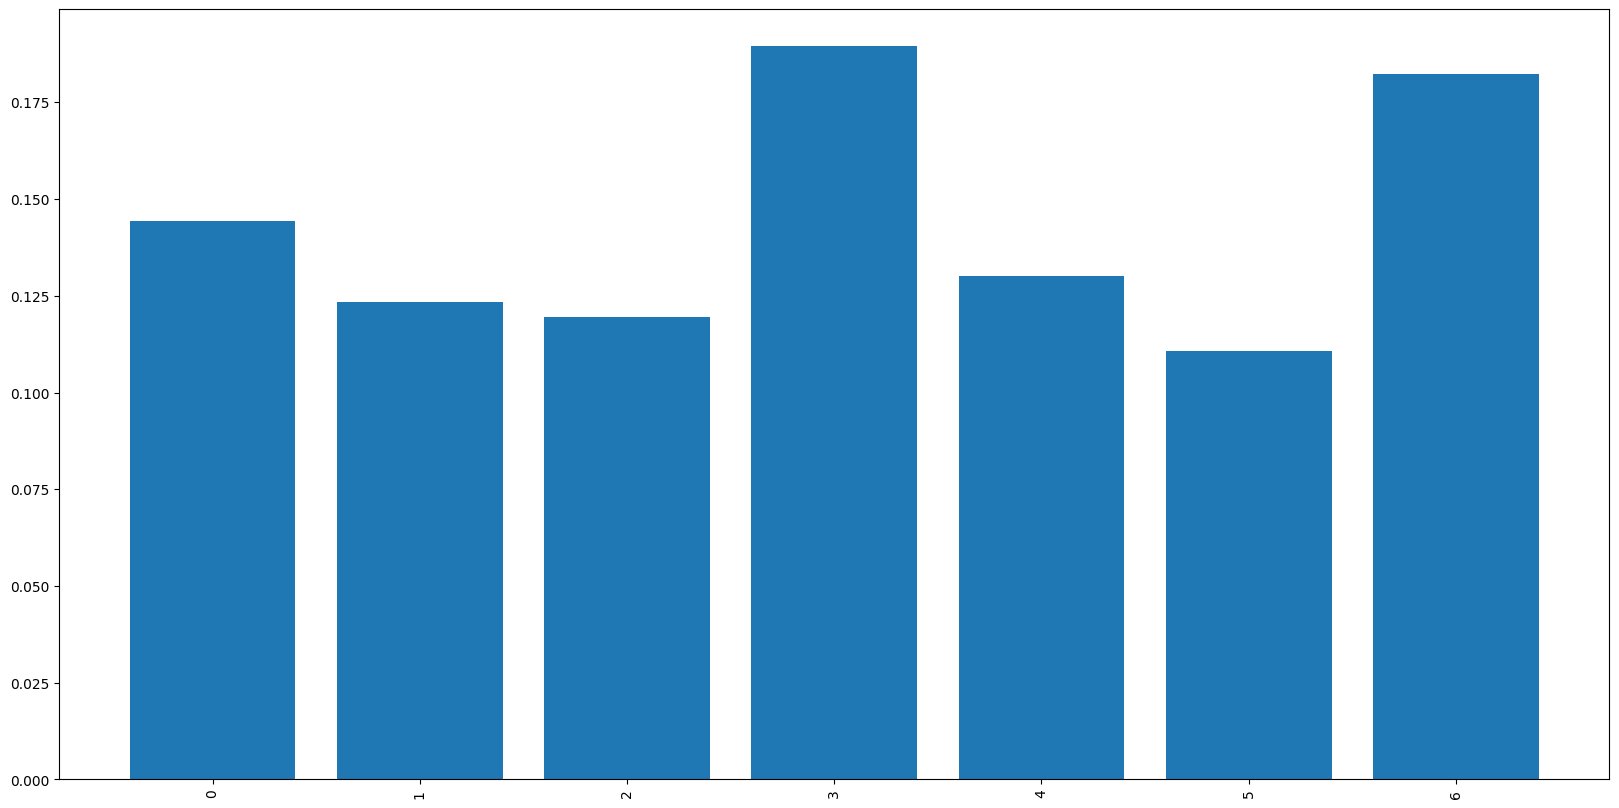

In [145]:
plt.figure(figsize=(20,10))
plt.bar(pd.DataFrame(X1).columns,xgbmodel1.feature_importances_)
plt.xticks(rotation=90);

In [147]:
from lightgbm import LGBMClassifier

In [148]:
light1=LGBMClassifier()

In [149]:
light1.fit(X1_train, y_train)

LGBMClassifier()

In [150]:
pred = light1.predict(X1_test)

In [151]:
light1_accuracy = accuracy_score(y_test,pred)
light1_accuracy

0.9661016949152542

In [152]:
light1.feature_importances_

array([231, 123, 187, 158,  76, 130, 247])

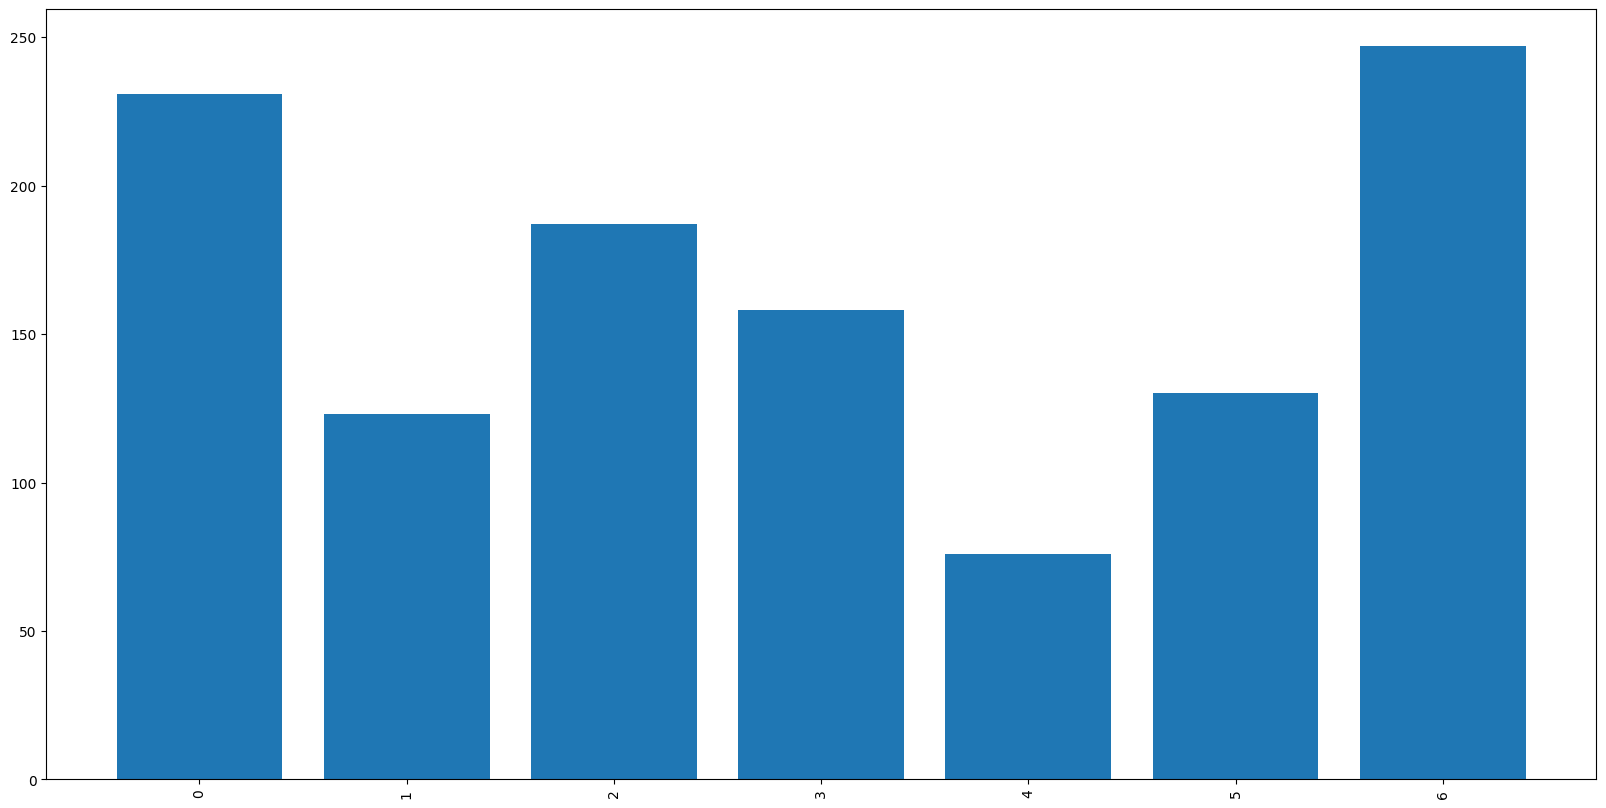

In [155]:
plt.figure(figsize=(20,10))
plt.bar(pd.DataFrame(X1).columns, light1.feature_importances_)
plt.xticks(rotation=90);



In [154]:
ranfor1.feature_importances_

array([0.24839729, 0.10255526, 0.11582802, 0.15807332, 0.0990202 ,
       0.08450503, 0.19162087])